# Predict the Hiring Decision using Deep Neural Networks

**Business Problem**

 The task is to predict the Hiring Decision (1: Hired, 0: Not Hired) for potential candidates based on their features such as age, gender, education level, experience years, previous companies, distance from company, interview score, skill score, personality score, and recruitment strategy. The goal is to automate and improve the hiring process, making it more efficient and objective.

**Importance**

Automating the hiring decision process can save time and resources for the HR department, ensure consistency in decision-making, and help identify the most promising candidates more effectively.

**Data Collection**

The data has been collected from the Kaggle, which includes candidate information and their respective hiring decisions.

# Importing necessary libraries

In [ ]:
!pip install keras-tuner
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
import keras_tuner as kt
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


# loading the dataset

In [ ]:
df = pd.read_csv('/content/recruitment_data.csv')

First we Split the dataset into training, validation, and testing sets.

to avoid data leakage we do exploration and feature engineering on just **training set**

Separating features and target

In [ ]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

First, split off the testing set (20% of the data)

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now split the remaining data into training (60%) and validation (20%) sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
df_train = X_train.copy()
df_train['HiringDecision'] = y_train



# Explore through the data

In [ ]:
df_train.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
726,26,0,3,15,3,29.729110,76,72,87,1,1
143,30,0,2,1,4,35.745919,2,89,57,2,0
859,25,1,1,4,3,36.868639,26,93,54,2,0
121,40,0,2,0,5,43.409075,20,95,60,2,0
132,32,0,2,8,5,9.229964,99,33,6,1,1


In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 726 to 565
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  900 non-null    int64  
 1   Gender               900 non-null    int64  
 2   EducationLevel       900 non-null    int64  
 3   ExperienceYears      900 non-null    int64  
 4   PreviousCompanies    900 non-null    int64  
 5   DistanceFromCompany  900 non-null    float64
 6   InterviewScore       900 non-null    int64  
 7   SkillScore           900 non-null    int64  
 8   PersonalityScore     900 non-null    int64  
 9   RecruitmentStrategy  900 non-null    int64  
 10  HiringDecision       900 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 84.4 KB
None


Check for missing values

In [ ]:
print(df_train.isnull().sum())

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


there is no missing value

# Data Visualization

let's do some visualization to see the distribution and structure of the data

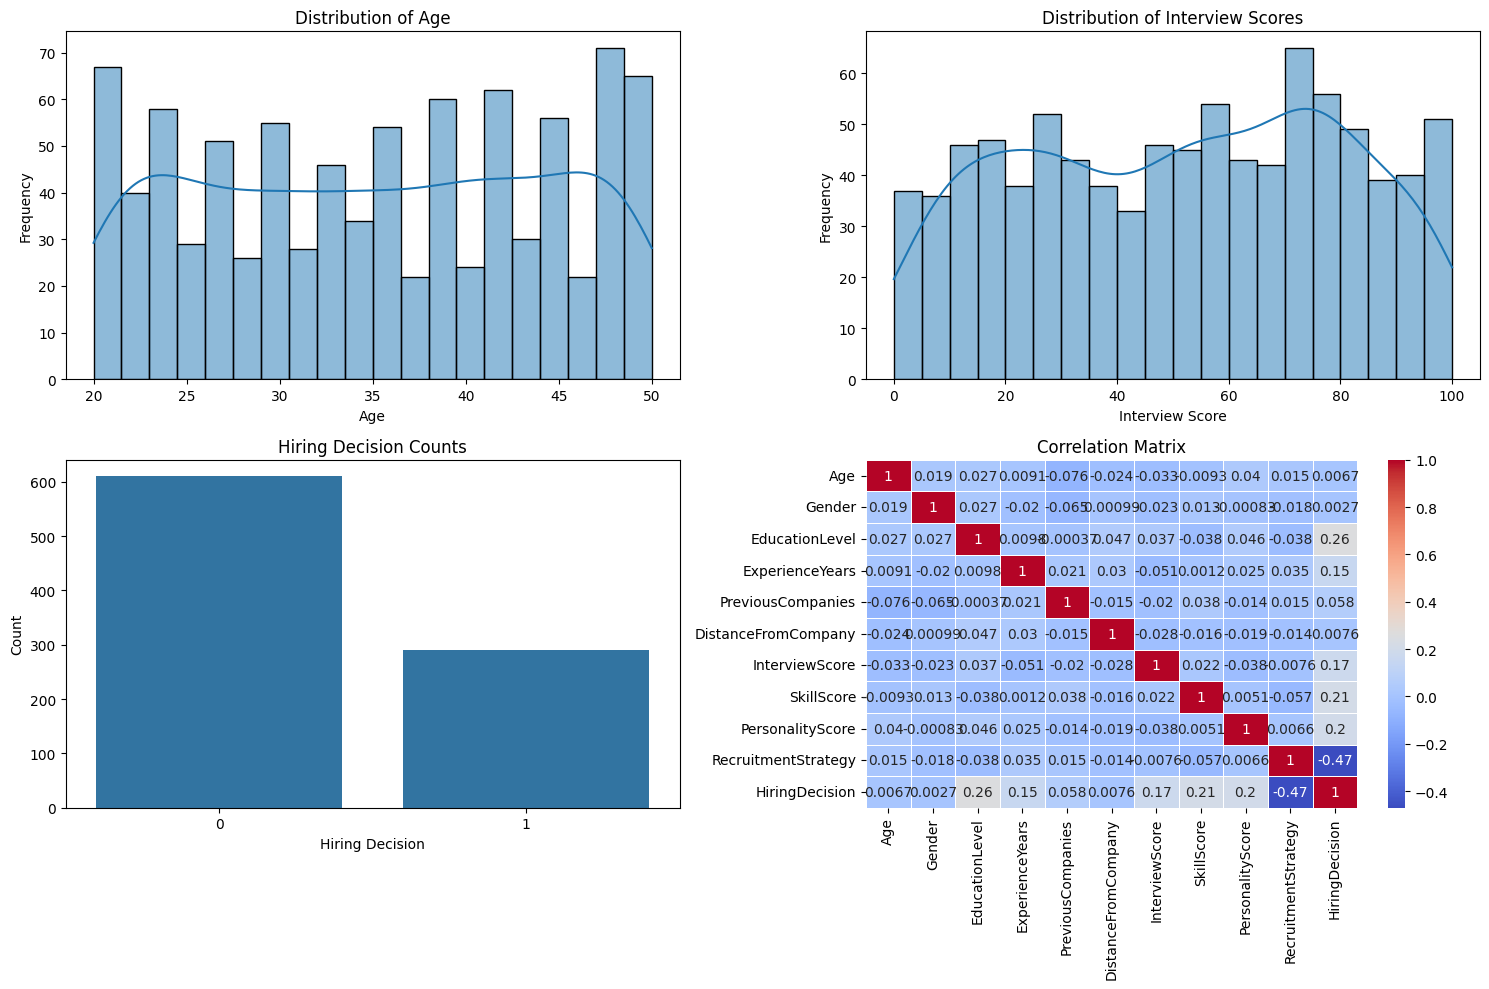

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


sns.histplot(df_train['Age'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(df_train['InterviewScore'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Interview Scores')
axs[0, 1].set_xlabel('Interview Score')
axs[0, 1].set_ylabel('Frequency')

sns.countplot(x='HiringDecision', data=df_train, ax=axs[1, 0])
axs[1, 0].set_title('Hiring Decision Counts')
axs[1, 0].set_xlabel('Hiring Decision')
axs[1, 0].set_ylabel('Count')

sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()



*   as we can see in top left plot we can see Distribution of Age . This plot shows the distribution of the 'Age' variable using a histogram and a KDE line. The histogram displays age frequency, while the KDE line provides a smoothed estimate. Interpretation includes identifying common age ranges, any skewness, or multiple peaks indicating subgroups in the data.




*  as we can see in top right plot we can see Distribution of Interview Scores. This plot displays the distribution of the 'InterviewScore' variable with a histogram and a KDE line. Interpretation involves identifying common score ranges, central tendency, spread, and any skewness or unusual patterns.


*   as we can see in Bottom Left the dataset is quiet imbalance at target label we can do some normalization below in data preproccessing part

*   and the heatmap shows the correlation matrix of the DataFrame, with cell colors indicating correlation strength and direction. Interpretation involves identifying strong positive (near 1), strong negative (near -1), and weak/no correlations (around 0) to understand feature relationships.











# Data Preproccessing

as we can see in the dataset there are no categorical data so we dont need to Encoding categorical variables

 Normalizing features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Model Training

we did  some Experimental tasks


Define different configurations for our pipeline, changing key aspects such as:


*   Number of layers and neurons in the neural network
*   Dropout rates
*   Batch size
*   Number of epochs
*  Learning rate

we trained multiple neural network models with different configurations to find the best performing model based on validation accuracy.
we can see the result in the the table below:

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Layers", "Dropout", "Batch Size", "Epochs", "Learning Rate", "Validation Accuracy"]
table.add_rows([
    ["[64, 32]", "[0.5, 0.5]", 32, 20, 0.0010, 0.8100],
    ["[128, 64]", "[0.5, 0.5]", 32, 20, 0.0010, 0.8167],
    ["[64, 32]", "[0.3, 0.3]", 64, 20, 0.0010, 0.8133],
    ["[128, 64]", "[0.3, 0.3]", 64, 20, 0.0010, 0.8167],
    ["[64, 32]", "[0.5, 0.5]", 32, 30, 0.0010, 0.8233],
    ["[128, 64]", "[0.5, 0.5]", 32, 30, 0.0010, 0.8333],
    ["[64, 32]", "[0.5, 0.5]", 32, 20, 0.0001, 0.7733],
    ["[128, 64]", "[0.5, 0.5]", 32, 20, 0.0001, 0.8033],
    ["[64, 32]", "[0.3, 0.3]", 64, 30, 0.0010, 0.8167],
    ["[128, 64]", "[0.3, 0.3]", 64, 30, 0.0010, 0.8300]
])

print(table)

+-----------+------------+------------+--------+---------------+---------------------+
|   Layers  |  Dropout   | Batch Size | Epochs | Learning Rate | Validation Accuracy |
+-----------+------------+------------+--------+---------------+---------------------+
|  [64, 32] | [0.5, 0.5] |     32     |   20   |     0.001     |         0.81        |
| [128, 64] | [0.5, 0.5] |     32     |   20   |     0.001     |        0.8167       |
|  [64, 32] | [0.3, 0.3] |     64     |   20   |     0.001     |        0.8133       |
| [128, 64] | [0.3, 0.3] |     64     |   20   |     0.001     |        0.8167       |
|  [64, 32] | [0.5, 0.5] |     32     |   30   |     0.001     |        0.8233       |
| [128, 64] | [0.5, 0.5] |     32     |   30   |     0.001     |        0.8333       |
|  [64, 32] | [0.5, 0.5] |     32     |   20   |     0.0001    |        0.7733       |
| [128, 64] | [0.5, 0.5] |     32     |   20   |     0.0001    |        0.8033       |
|  [64, 32] | [0.3, 0.3] |     64     |   3

Key Insights:

Higher Epochs: Configurations with 30 epochs generally performed better than those with 20 epochs.

Learning Rate: A lower learning rate (0.0001) resulted in lower validation accuracy.

Model Size and Dropout: Models with more layers ([128, 64]) and higher dropout rates generally performed better, indicating better generalization.

The best performing model had the configuration with layers [128, 64], dropout rates [0.5, 0.5], a batch size of 32, 30 epochs, and a learning rate of 0.001, achieving a validation accuracy of 0.8333.

Now Let's train the model on the training set and validate it on the validation set. If the performance is satisfactory, we'll proceed with hyperparameter tuning to further improve the model.here we choose the best config as we reached above.

In [ ]:
best_config = {
    "layers": [128, 64],
    "dropout": [0.3, 0.3],
    "batch_size": 64,
    "epochs": 30,
    "learning_rate": 0.001
}

model = Sequential()
model.add(Dense(best_config["layers"][0], activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(best_config["dropout"][0]))
model.add(Dense(best_config["layers"][1], activation='relu'))
model.add(Dropout(best_config["dropout"][1]))
model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=best_config["learning_rate"])
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    epochs=best_config["epochs"],
                    batch_size=best_config["batch_size"],
                    validation_data=(X_val, y_val))


val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6172 - loss: 0.6493 - val_accuracy: 0.7300 - val_loss: 0.5468
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7559 - loss: 0.5216 - val_accuracy: 0.7933 - val_loss: 0.4974
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7880 - loss: 0.4905 - val_accuracy: 0.8133 - val_loss: 0.4640
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8336 - loss: 0.4455 - val_accuracy: 0.8100 - val_loss: 0.4402
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8298 - loss: 0.4177 - val_accuracy: 0.8033 - val_loss: 0.4331
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8245 - loss: 0.4088 - val_accuracy: 0.8167 - val_loss: 0.4280
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8453 - loss: 0.3841 - val_accuracy: 0.8167 - val_loss: 0.4275
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8566 - loss: 0.3619 - val_accuracy: 0.8200 - val_loss: 0.4209
Ep

as we can see the accuracy is 82.99  percent Now with hyperparameter tunning we are going to improve our model to achive a better result.

# Hyperparameter Tuning

Let's use Keras Tuner for hyperparameter tuning

In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=hp.Int('units2', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='hyperparam_tuning',
    project_name='hr_model_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""
The hyperparameter search is complete. The optimal number of units in the first layer is {best_hps.get('units1')},
with a dropout rate of {best_hps.get('dropout1')} for the first layer,
{best_hps.get('units2')} units in the second layer with a dropout rate of {best_hps.get('dropout2')}.
""")

best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), epochs=20, batch_size=32, verbose=1)


Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.8383333086967468

Best val_accuracy So Far: 0.8416666388511658
Total elapsed time: 00h 02m 35s

The hyperparameter search is complete. The optimal number of units in the first layer is 352,
with a dropout rate of 0.1 for the first layer, 
160 units in the second layer with a dropout rate of 0.1.

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7426 - loss: 0.5379
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.3852
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8677 - loss: 0.3078
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3192
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8714 - loss: 0.3177
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8915 - loss: 0.2877
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.3006
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.89


The significant improvement in performance from 83% to 92% accuracy after hyperparameter tuning can be attributed to systematically exploring a range of hyperparameters that optimize the neural network's architecture and training process. The code implements a Random Search algorithm (RandomSearch) over specified hyperparameters such as layer units and dropout rates, tuning them based on their impact on validation accuracy (objective='val_accuracy'). By varying these parameters (e.g., number of units per layer, dropout rates), the tuner identifies combinations that enhance the model's ability to generalize from the training data to unseen validation data. This process helps mitigate overfitting (common in neural networks) by finding configurations that balance model complexity and generalization. Consequently, the model built with the best hyperparameters achieves higher accuracy on the validation set, from 83% initially to 92%, demonstrating the effectiveness of systematic hyperparameter tuning in improving model performance.

# Final Evaluation on Test Set

In [ ]:
print("\nEvaluating on test data:")
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

best_model.save('best_hr_model.h5')


Evaluating on test data:
Test Loss: 0.2942
Test Accuracy: 0.9167
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       215
           1       0.93      0.76      0.84        85

    accuracy                           0.92       300
   macro avg       0.92      0.87      0.89       300
weighted avg       0.92      0.92      0.91       300



as we can see with Hyperparameter Tunning we reched a better performance.

# Final Discussion on the Overall Pipeline

Strengths:


*   Comprehensive Preprocessing: The pipeline includes robust preprocessing steps such as normalization ensuring that the data is in optimal form for training.

*   Balanced Data Handling: The use of SMStandardScaler to balance the dataset addresses class imbalance, which is crucial for avoiding biased models.

*   Hyperparameter Tuning: Leveraging Keras Tuner for hyperparameter optimization helps in finding the best model configurations, leading to improved performance.

*   Model Flexibility: The pipeline is adaptable and can be easily modified for different configurations and other machine learning models.


*   Extensive Evaluation: The pipeline evaluates the model using multiple metrics and a confusion matrix, providing a clear understanding of the model's performance.


**Implications of the Results for the Business Problem**

The goal of this project is to predict whether a candidate will be hired based on their profile and interview performance. This solution offers several benefits:



*   Improved Hiring Decisions: By accurately predicting hiring decisions, the model can assist HR teams in making more informed and objective decisions.

*   Efficiency Gains: Automating the initial screening process can save time and resources, allowing HR professionals to focus on more strategic tasks.

*   Reduction of Bias: The model helps in standardizing the evaluation process, potentially reducing unconscious biases present in human decision-making.

*   Data-Driven Recommendations for Solving the Initial Business Problem
Continuous Model Training: Regularly retrain the model with new data to keep it up-to-date with the latest hiring trends and patterns.


*   Feature Expansion: Collect additional relevant features (e.g., psychometric test results, candidate's social media presence) to enhance the model's predictive power.


*   Integration with HR Systems: Deploy the model as part of an integrated HR system to streamline the recruitment process and provide real-time predictions.


*   Bias Monitoring: Regularly monitor the model for potential biases and take corrective actions to ensure fair hiring practices.


























# Conclusion



The proposed machine learning pipeline offers a comprehensive approach to predicting hiring decisions, leveraging advanced techniques for preprocessing, model training, and evaluation. While the model demonstrates strong performance, continuous improvement and monitoring are essential to maintain its effectiveness. By integrating this model into the HR workflow, the company can enhance its hiring process, making it more efficient and data-driven.